# **Big mart sales predicition** 

* Arpit Saxena (180040019)
* Utkarsh Sahu (180100120)
* Vinut Raibagi (203100056)
* Ashish Kumar (213370007)
* Arpit Tiwari (190110011)

### **Problem Statement**
The data scientists at **Big Mart** have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet. Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

### **Data Availibility**
There are train (8523) and test (5681) data set, train data set has both input and output variable(s). We need to predict the sales for test data set. Thus, this is a **supervised learning regression problem** as the outpit variable is continuous.

The problem is tackled in the following steps:


*   **Hypothesis Generation** - understanding the problem better by brainstorming possible factors that can impact the outcome
*   **Exploratory Data Analysis** - looking at categorical and continuous feature summaries and thus, making inferences about the data.
*   **Data Cleaning** - Assuming the missing values from with Data Analysis
*   **Feature Engineering** - Modifying existing variables and creating new variables. Thus reducing the dimensionality of the problem
*   **Model building** - Making predictive analysis using various regression techniques and comparing them

## **Hypothesis Generation**

### **Store Level Hypothesis**
*   **City type**: Stores located in urban or Tier 1 cities should have higher sales because of the higher income levels of people there.
*   **Population Density**: Stores located in densely populated areas should have higher sales because of more demand.
*   **Store Capacity**: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.
*   **Competitors**: Stores having similar establishments nearby should have less sales because of more competition.
*   **Marketing**: Stores which have a good marketing division should have higher sales as it will be able to attract customers through the right offers and advertising.
*   **Location**: Stores located within popular marketplaces should have higher sales because of better access to customers.

### **Product Level Hypotheses**
*   **Brand**: Branded products should have higher sales because of higher trust in the customer.
*   **Packaging**: Products with good packaging can attract customers and sell more.
*   **Utility**: Daily use products should have a higher tendency to sell as compared to the specific use products.
*   **Display Area**: Products which are given bigger shelves in the store are likely to catch attention first and sell more.
*   **Visibility in Store**: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

We can think about other parameters like advertising, promotional offers, etc. which might impact the sales. For now, we will proceed towards exploratory data analysis.

## **Exploratory Data Analysis**
We will look at the data and try to identify the information which we hypothesized vs the available data. As given on the competition [website](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement), the train dataset has the following attributes:

* Item_Identifier -- Unique product ID.
* Item_Weight -- Weight of product.
* Item_Fat_Content -- Whether the product is low fat or not.
* Item_Visibility -- The % of total display area of all products in a store allocated to the particular product. Related to Display Area hypotheses.
* Item_Type -- The category to which the product belongs.
* Item_MRP -- Maximum Retail Price (list price) of the product.
* Outlet_Identifier -- Unique store ID.
* Outlet_Establishment_Year -- The year in which store was established.
* Outlet_Size -- The size of the store in terms of ground area covered. Related to Store Capacity hypotheses.
* Outlet_Location_Type -- The type of city in which the store is located. Related to City type hypotheses.
* Outlet_Type -- Whether the outlet is just a grocery store or some sort of supermarket. Related to Store Capacity hypotheses.
* Item_Outlet_Sales -- Sales of the product in the particular store. This is the outcome variable to be predicted.

On the other hand, the test dataset has all the above mentioned attributes except Item_Outlet_Sales. As a part of the competition, we have to predict the Item_Outlet_Sales for all the items in the test dataset and submit a csv file with three columns, as given below:

* Item_Identifier -- Unique product ID
* Outlet_Identifier -- Unique store ID
* Item_Outlet_Sales -- Sales of the product in the particular store. This is the outcome variable to be predicted.

Let's start


















In [141]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
import warnings
warnings.filterwarnings("ignore")

In [143]:
from google.colab import files
uploaded = files.upload()

Saving Test_u94Q5KV.csv to Test_u94Q5KV (2).csv
Saving Train_UWu5bXk.csv to Train_UWu5bXk (2).csv


In [144]:
Train_data = pd.read_csv(io.BytesIO(uploaded['Train_UWu5bXk.csv']))
Test_data = pd.read_csv(io.BytesIO(uploaded['Test_u94Q5KV.csv']))

In [145]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [146]:
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [147]:
print('Shape of Train_data',Train_data.shape)
print('Shape of Test_data',Test_data.shape)

Shape of Train_data (8523, 12)
Shape of Test_data (5681, 11)


In [148]:
Train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [149]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [150]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Its generally a good idea to combine both train and test datasets into one, perform feature engineering and then divide them later again. We will combine train and test into a dataframe data with a source column specifying where each observation belongs.

In [151]:
Train_data['source'] = 'train'
Test_data['source'] = 'test'
df = pd.concat([Train_data,Test_data],ignore_index=True)

In [152]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,train
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,train
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train


In [153]:
df.tail(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14194,FDA01,15.00,reg,0.054463,Canned,59.5904,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test
14195,NCH42,6.86,Low Fat,0.036594,Household,231.1010,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test
14196,FDF46,7.07,Low Fat,0.094053,Snack Foods,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14197,DRL35,15.70,Low Fat,0.030704,Hard Drinks,43.2770,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14198,FDW46,13.00,Regular,0.070411,Snack Foods,63.4484,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN,test
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.50,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [154]:
print('Shape of concatenated dataframe',df.shape)
df.isnull().sum()

Shape of concatenated dataframe (14204, 13)


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [155]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


From the above mentioned statistics, we can observe that


*   **Item_Visibility** has a minimum value of zero. This makes no practical sense because when a product is being sold in a store, the visibility cannot be 0.
*   **Outlet_Establishment_Year** varies from 1985 to 2009. The values might not be apt in this form. Rather, if we can convert them to how old the particular store is, it should have a better impact on sales.
*   The lower count of **Item_Weight** and **Item_Outlet_Sales** substantiates the fact that there are missing values in these two columns.

### **Exploring Numerical predictors**
Down below we will visualize the distribution of numerical predictors. This will help in better understanding of predictors. Both the pdf and box plot are visualized to see distribution as well as outliers of the training data set



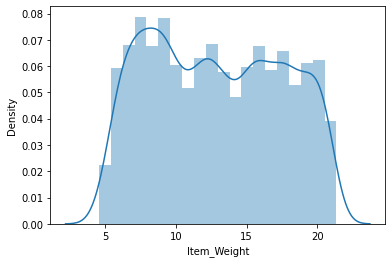

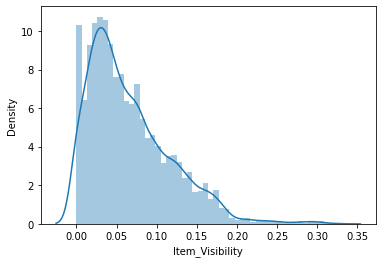

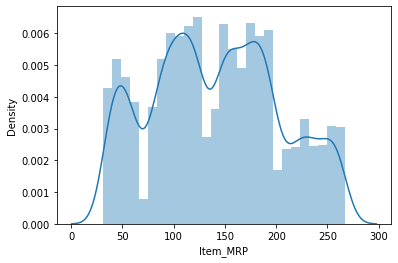

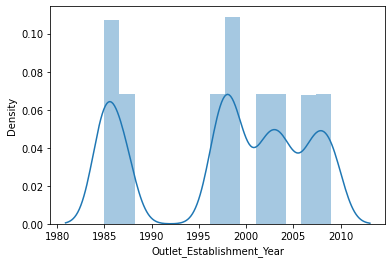

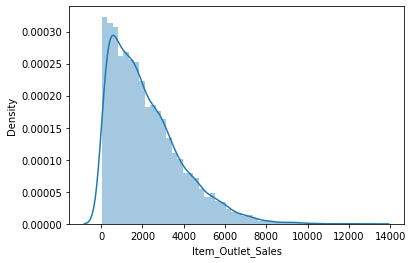

In [159]:
for i in Train_data.describe().columns:
  sns.distplot(Train_data[i].dropna())
  plt.show()

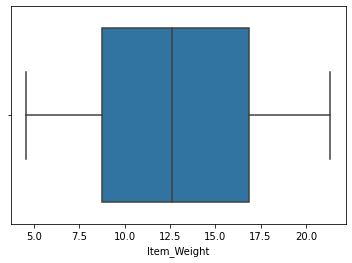

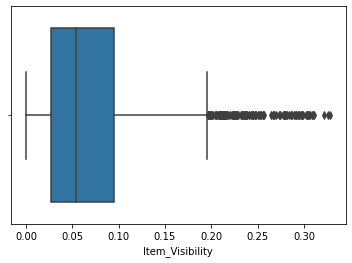

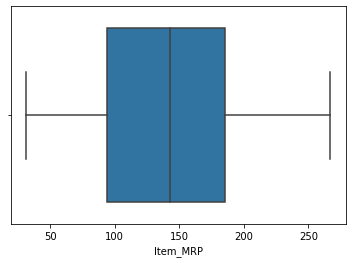

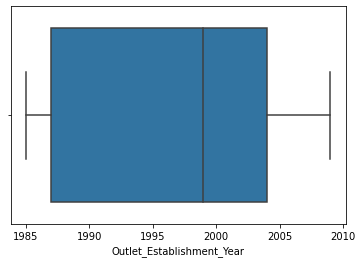

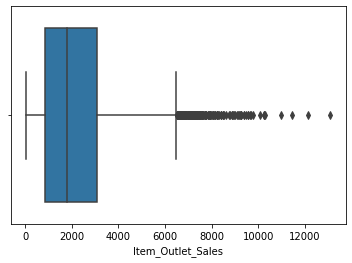

In [160]:
for i in Train_data.describe().columns:
  sns.boxplot(Train_data[i].dropna())
  plt.show()

### **Exploring Categorical predictors**

In [161]:
Train_data.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
source                          1
dtype: int64

The Categorical variables are Item_Identifier, Item_Fat_Content, Item_Type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type and Outlet_Type. Let's try to explore them each

In [162]:
Train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

**Item_Type** has 16 unique items. From the hypothesis we know that the food and drink items have high sales compared to others.

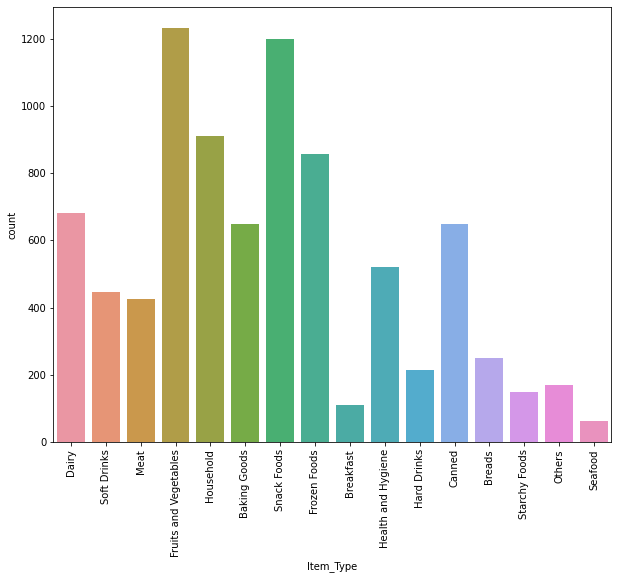

In [163]:
# Bar graph of value count of Item type
plt.figure(figsize=(10,8))
sns.countplot(Train_data['Item_Type'])
plt.xticks(rotation=90)
plt.show()

In [164]:
Train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

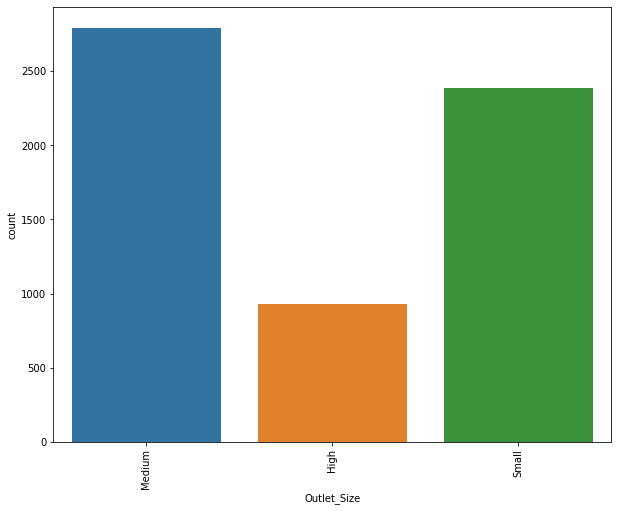

In [165]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data['Outlet_Size'])
plt.xticks(rotation=90)
plt.show()

In [166]:
Train_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

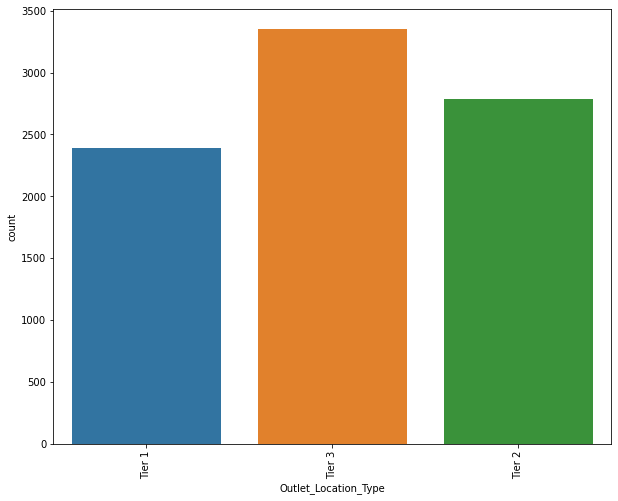

In [167]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data['Outlet_Location_Type'])
plt.xticks(rotation=90)
plt.show()

In [168]:
Train_data['Outlet_Type'].value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

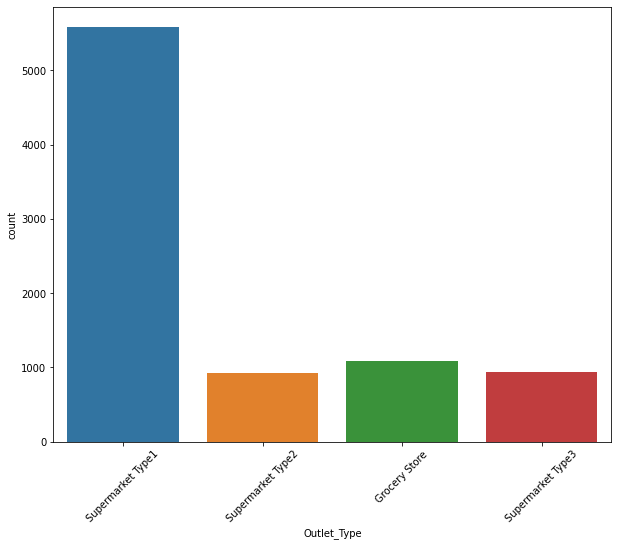

In [169]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data['Outlet_Type'])
plt.xticks(rotation=45)
plt.show()

In [170]:
Train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

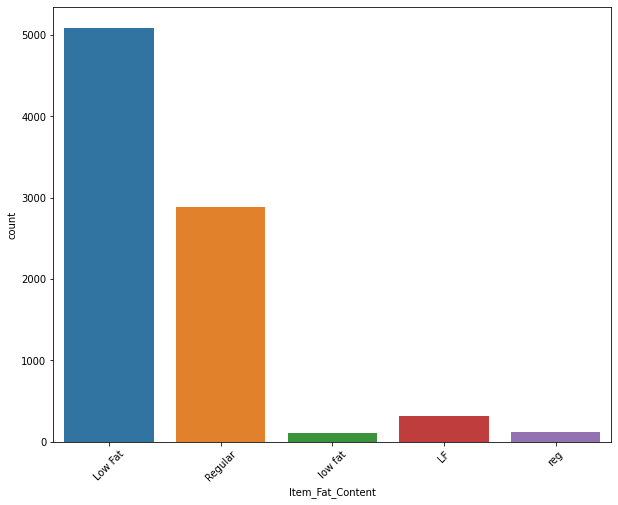

In [171]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data['Item_Fat_Content'])
plt.xticks(rotation=45)
plt.show()

From the above graph **Item_Fat_Content** contains 5 categories. But Low Fat, low fat and LF all represents same low fat content products and similarly reg and Regular are same. Therefore, this variable must be processed before modelling

In [172]:
Train_data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

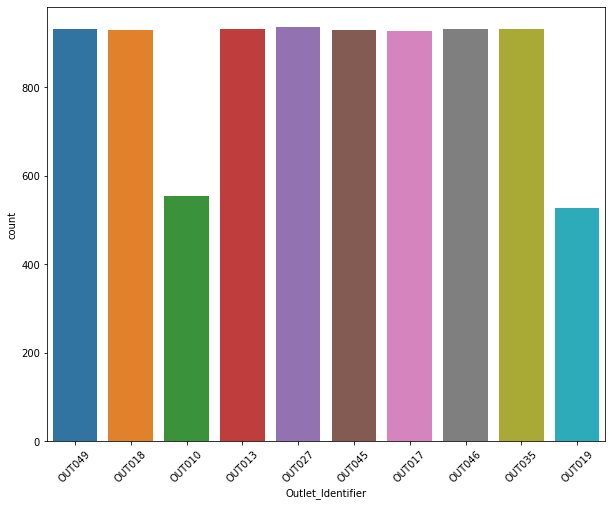

In [173]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data['Outlet_Identifier'])
plt.xticks(rotation=45)
plt.show()

**Correlation plots**
Correlation plots are made for further analysis

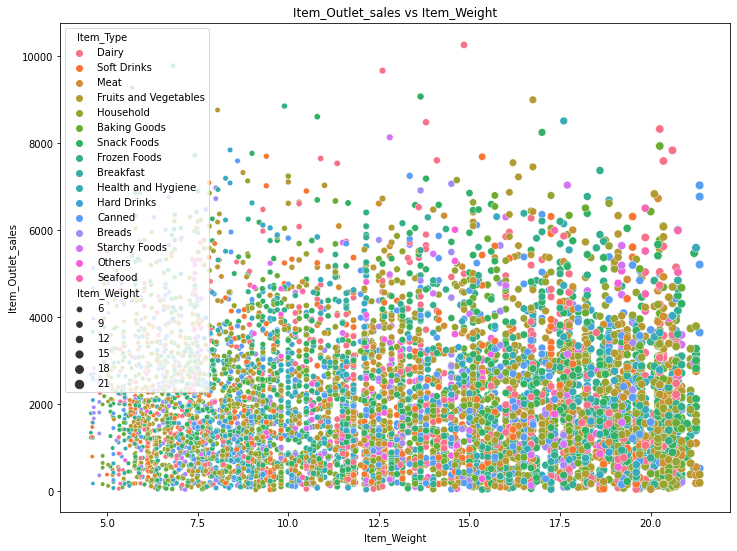

In [174]:
plt.figure(figsize=(12,9))
sns.scatterplot(data=Train_data,x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_sales')
plt.title('Item_Outlet_sales vs Item_Weight')
plt.show()

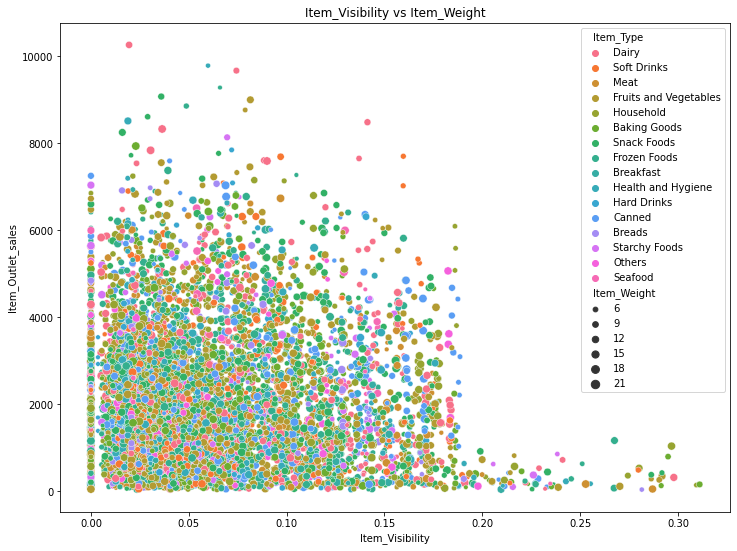

In [175]:
plt.figure(figsize=(12,9))
sns.scatterplot(data=Train_data,x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_sales')
plt.title('Item_Visibility vs Item_Weight')
plt.show()

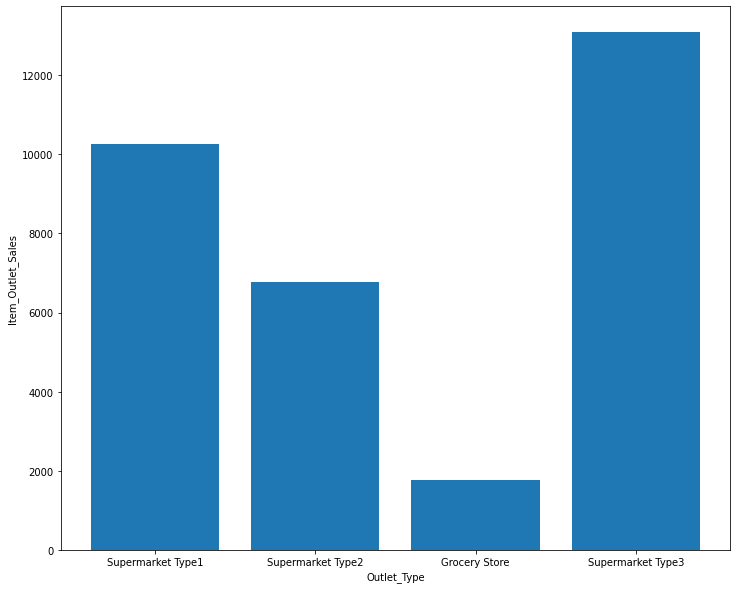

In [176]:
plt.figure(figsize = (12,10))
plt.bar(Train_data['Outlet_Type'],Train_data['Item_Outlet_Sales'])
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.show()

As discussed above the variable 'Item_Fat_Content' is processed to ensure there are only two categories in that variable

In [177]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat','Low fat':'Low Fat'})

In [178]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [179]:
Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat','Low fat':'Low Fat'})

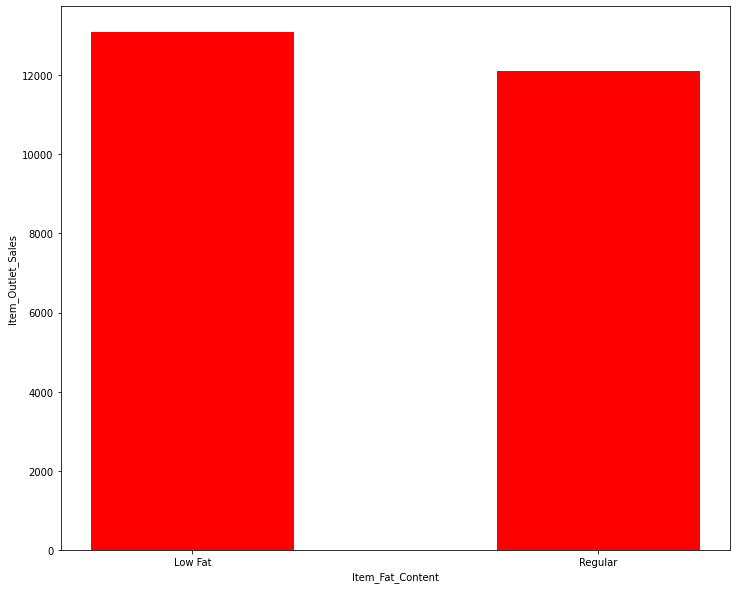

In [180]:
plt.figure(figsize = (12,10))
plt.bar(Train_data['Item_Fat_Content'],Train_data['Item_Outlet_Sales'],width=0.5,color='r')
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.show()

In [181]:
Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


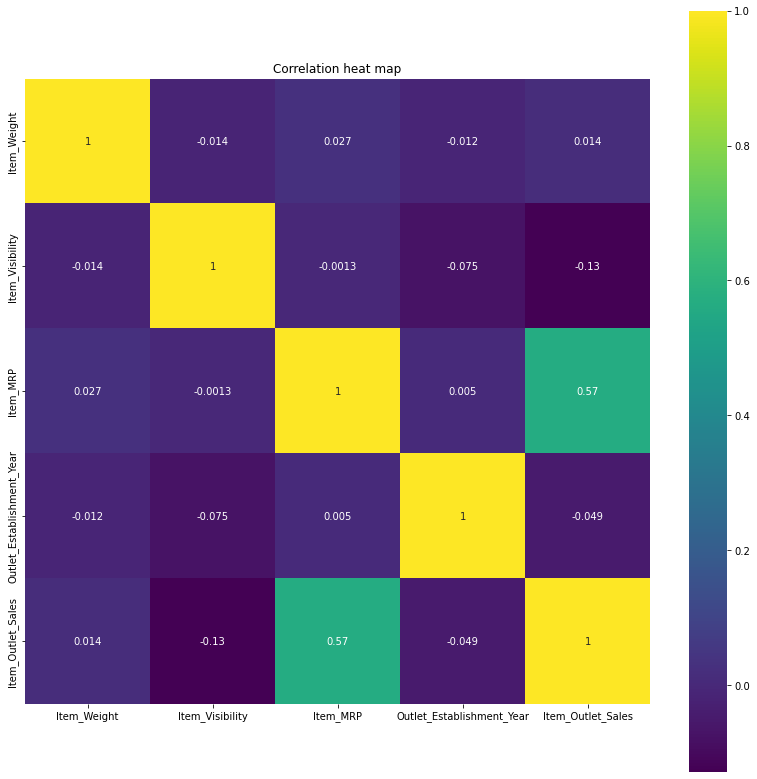

In [182]:
plt.figure(figsize=(14,14))
sns.heatmap(Train_data.corr(),square=True,annot=True,cmap='viridis')
plt.title('Correlation heat map')
plt.show()

### **Data Cleaning**
Here, we will deal with the imputation of missing values. In the previous section, we noticed that there are two variables with missing values -- Item_Weight and Outlet_Size. We will impute the Item_Weight by the average weight of the particular item.

* Item weight - Missing values are replaced by mean as it is almost normally distributed observed from the pdf plot




In [183]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df['Item_Weight'].isna().sum()

0

* Outlet_Size - Missing values are replaced by category medium as it is high count

In [184]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [185]:
df['Outlet_Size'].fillna('Medium',inplace=True)  # Outlet_size is replaced by most frequent i.e. Medium size

In [186]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [187]:
z = df['Item_Visibility']==0
z.value_counts()

False    13325
True       879
Name: Item_Visibility, dtype: int64

* Item_Visiblity - we noticed that the minimum value of Item_Visibility is 0, which makes no practical sense. We will treat the zero entries as missing values and replace the missing values as median as the odf plot is left skewed

In [188]:
df['Item_Visibility'].replace(0,df['Item_Visibility'].median(),inplace=True)
z = df['Item_Visibility']==0
z.value_counts()

False    14204
Name: Item_Visibility, dtype: int64

* Outlet_Establishment_Year - It will be better to define a new variable 'Outlet_Years' which tells how many years the store is opened compared to establishment year

In [189]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [190]:
df['Outlet_Years'] = 2009 - df['Outlet_Establishment_Year']        # 2009 data collected
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

* Item_Type - Since there are 16 different categories in Item_type and since these are categorical in nature the number of features increases to the model. Hence to reduce the dimensionality of model a new variable is defined 'New_Item_type' to group these into only 3 categories namely Food,Drink and Non-edible

In [191]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [192]:
df['Item_Identifier'].value_counts()

FDT14    10
FDV19    10
FDJ53    10
FDT11    10
FDR19    10
         ..
NCW54     7
DRN11     7
NCL42     7
FDO33     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: int64

The first two letters of 'Item_Identifier' will help in grouping these items

In [193]:
df['New_Item_type'] = df['Item_Identifier'].apply(lambda x:x[0:2])
df['New_Item_type'].replace({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'},inplace=True)
df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64

Also, 'Non-Edible' is replaced in variable 'Item_Fat_Content' in rows where 'Non_Consumable' is there

In [194]:
df.loc[df['New_Item_type'] == 'Non-Consumable','Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In the section Hypothesis Generation, we inferred that products with higher visibility are likely to sell more. But along with comparing products on absolute terms, we need to look at the visibility of the product in that particular store as compared to the mean visibility of that product across all stores. This will give some idea about how much importance was given to that product in a store as compared to other stores. We will add a new column item_visib_avg by using the visibility_avg variable defined above.

In [195]:
item_visib_avg = df.pivot_table(values='Item_Visibility',index = 'Item_Identifier')

In [196]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.046942
DRA24,0.045646
DRA59,0.138786
DRB01,0.086489
DRB13,0.012801
...,...
NCZ30,0.032704
NCZ41,0.063148
NCZ42,0.016417


In [197]:
func = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(func,axis=1).astype(float)

In [198]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.733187
3,FDX07,19.20,Regular,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,1.810406
4,NCD19,8.93,Non-Edible,0.054021,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,1.944117


### **Encoding Categorical Variables**
Since scikit-learn accepts only numerical variables, we will converted all categorical variables into numeric ones. Also, we will create a new variable Outlet same as Outlet_Identifier. Outlet_Identifier should remain as it is, because it will be required in the submission file.

Now, we will begin with the encoding of all categorical variables as numeric using LabelEncoder.

In [199]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# New variable for outlet
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
variables = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet']
for i in variables:
    df[i] = le.fit_transform(df[i])

In [200]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,0.931078,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,0.933420,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,0.733187,9
3,FDX07,19.20,2,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,11,1,1.810406,0
4,NCD19,8.93,1,0.054021,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,22,2,1.944117,1


### **Dealing with Categorical Variables**
Now we create dummy variables for these Label encoded variables in order to avoid our algorithm ranking

In [201]:
# Dummy Variables
df = pd.get_dummies(df, columns=variables)
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet_Years,item_visib_avg,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,New_Item_type_0,New_Item_type_1,New_Item_type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,train,10,0.931078,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,train,0,0.933420,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,train,10,0.733187,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.054021,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,train,11,1.810406,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.054021,Household,53.8614,OUT013,1987,994.7052,train,22,1.944117,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [202]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

## **Model Building**

In [203]:
# Drop the columns which have been converted to different types:
df.drop(columns=['Item_Type','Outlet_Establishment_Year'],inplace=True)

# Divide into test and train:
train = df.loc[df['source']=="train"]
test = df.loc[df['source']=="test"]

# Drop unnecessary columns:
test.drop(columns=['Item_Outlet_Sales','source'],inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [204]:
X_train = df.drop(columns=['Item_Identifier','Item_Outlet_Sales','Outlet_Identifier'])
Y_train = train['Item_Outlet_Sales']

X_test = df.drop(columns=['Item_Identifier','Outlet_Identifier'])

We will start by making a baseline model. Baseline model is the one which requires no predictive model and its like an informed guess. For instance, in this case, we will predict the sales as the overall average sales.

In [206]:
# Mean based baseline model 
mean_sales = Y_train.mean()

# Define a dataframe with IDs for submission
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

# Export submission file
base1.to_csv("baseline_model.csv",index=False)

Now, we will implement other models. For this, we would define a generic function which takes the algorithm and data as input and makes the model, performs cross-validation and generates the submission file.

In [210]:
# Define target and ID columns
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

from sklearn import metrics
from sklearn.model_selection import cross_val_score
import numpy as np

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    
    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    # Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    # Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error', n_jobs=1)
    cv_score = np.sqrt(np.abs(cv_score))
    
    print("Model report:")
    print("-"*40)
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])

    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

## **Linear Regression Model**

Model report:
----------------------------------------
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.51 | Min - 1075 | Max - 1211


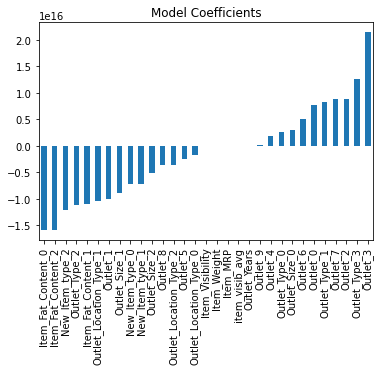

In [211]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]

# print predictors
lin_reg = LinearRegression(normalize=True)
modelfit(lin_reg, train, test, predictors, target, IDcol, 'lin_reg.csv')
coef1 = pd.Series(lin_reg.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

## **Ridge Regression Model**

Model report:
----------------------------------------
RMSE : 1183
CV Score : Mean - 1183 | Std - 54.57 | Min - 1105 | Max - 1300


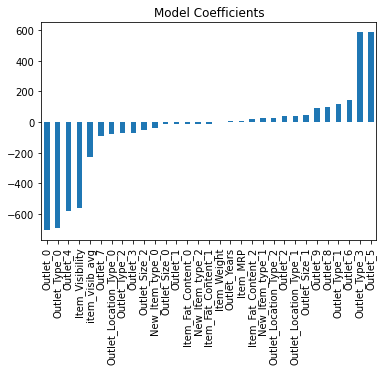

In [220]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
ridge_reg = Ridge(alpha=0.5,normalize=True)
modelfit(ridge_reg, train, test, predictors, target, IDcol, 'ridge_reg.csv')
coef2 = pd.Series(ridge_reg.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')

## **Decision Tree Model**

Model report:
----------------------------------------
RMSE : 1059
CV Score : Mean - 1093 | Std - 44.67 | Min - 1020 | Max - 1183


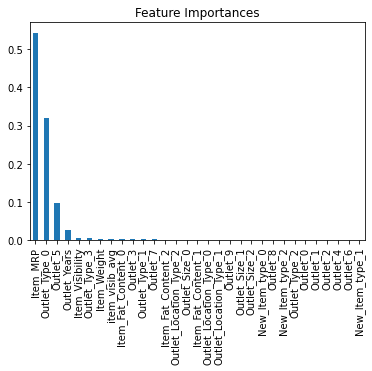

In [221]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
dec_tree = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(dec_tree, train, test, predictors, target, IDcol, 'dec_tree.csv')
coef3 = pd.Series(dec_tree.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

 Here you can see that the RMSE is 1058 and the mean CV error is 1091. It tells us that the model is slightly overfitting. So, we will try making a decision tree with just top 4 variables, a max_depth of 8 and min_samples_leaf as 150.

Model report:
----------------------------------------
RMSE : 1071
CV Score : Mean - 1096 | Std - 43.3 | Min - 1027 | Max - 1172


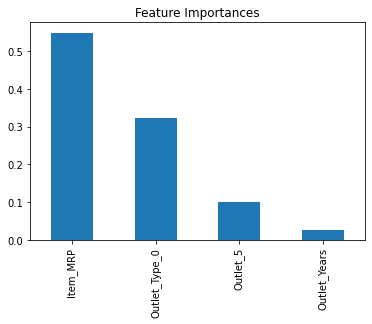

In [222]:
predictors = ['Item_MRP','Outlet_Type_0','Outlet_5','Outlet_Years']
dec_tree_2 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(dec_tree_2, train, test, predictors, target, IDcol, 'dec_tree_2.csv')
coef4 = pd.Series(dec_tree_2.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')

## **Random Forest Model**

Model report:
----------------------------------------
RMSE : 1068
CV Score : Mean - 1083 | Std - 43.55 | Min - 1020 | Max - 1160


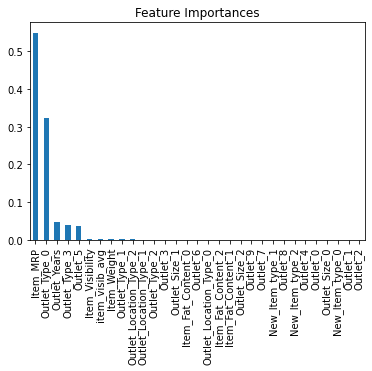

In [223]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
rand_for = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
modelfit(rand_for, train, test, predictors, target, IDcol, 'rand_for.csv')
coef6 = pd.Series(rand_for.feature_importances_, predictors).sort_values(ascending=False)
coef6.plot(kind='bar', title='Feature Importances')